# Assignment 3 

# Association Rule Mining

Submitted by : Shivani Shrikant Naik

In [62]:
import pandas as pd
import numpy as np
pd.set_option("max_colwidth", 150)
pd.options.display.max_rows = 1000

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import patsy

In [63]:
f = "https://github.com/cs6220/cs6220.spring2019/raw/master/data/Online%20Retail.xlsx"
df = pd.read_excel(f)
basket = (df[df["Country"] == "United Kingdom"]
          .groupby(["InvoiceNo", "Description"])["Quantity"]
          .sum().unstack().reset_index().fillna(0)
          .set_index("InvoiceNo")) # transform transactions into baskets of items
basket_sets = basket.applymap(lambda x: 1 if x >=1 else 0) # convert counts to booleans

In [64]:
basket_sets


Description,20713,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C581484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C581490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C581499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
frequent_itemsets = apriori(basket_sets, use_colnames=True, min_support = 0.025, max_len=2)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x:len(x))
frequent_itemsets

,support,itemsets,length
0,0.038793,(6 RIBBONS RUSTIC CHARM),1
1,0.026361,(60 CAKE CASES VINTAGE CHRISTMAS),1
2,0.034165,(60 TEATIME FAIRY CAKE CASES),1
3,0.025181,(72 SWEETHEART FAIRY CAKE CASES),1
4,0.039746,(ALARM CLOCK BAKELIKE GREEN),1
5,0.029764,(ALARM CLOCK BAKELIKE PINK),1
6,0.042196,(ALARM CLOCK BAKELIKE RED ),1
7,0.030672,(ANTIQUE SILVER T-LIGHT GLASS),1
8,0.062205,(ASSORTED COLOUR BIRD ORNAMENT),1
9,0.035799,(BAKING SET 9 PIECE RETROSPOT ),1


### 1.1.1 Top 5 1-itemsets with highest support

In [66]:
frequent_1_itemsets = frequent_itemsets[frequent_itemsets.length == 1].sort_values(by = 'support', ascending=False)
frequent_1_itemsets.head(5)

,support,itemsets,length
123,0.098276,(WHITE HANGING HEART T-LIGHT HOLDER),1
54,0.087931,(JUMBO BAG RED RETROSPOT),1
99,0.076452,(REGENCY CAKESTAND 3 TIER),1
87,0.072323,(PARTY BUNTING),1
72,0.063158,(LUNCH BAG RED RETROSPOT),1


### 1.1.2 Top 5 2-itemsets with highest support

In [67]:
frequent_2_itemsets = frequent_itemsets[frequent_itemsets.length == 2].sort_values(by = 'support', ascending=False)
frequent_2_itemsets.head(5)

,support,itemsets,length
132,0.035617,"(JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROSPOT)",2
130,0.031806,"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGENCY TEACUP AND SAUCER)",2
134,0.031670,"(JUMBO STORAGE BAG SUKI, JUMBO BAG RED RETROSPOT)",2
133,0.029809,"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG RED RETROSPOT)",2
135,0.027541,"(LUNCH BAG RED RETROSPOT, LUNCH BAG BLACK SKULL.)",2


### 1.1.3 Highest support for 1-itemset

In [68]:
frequent_1_itemsets.head(1)

,support,itemsets,length
123,0.098276,(WHITE HANGING HEART T-LIGHT HOLDER),1


Highest support for frequent 1-itemset is 0.098276 or 9.86% (WHITE HANGING HEART T-LIGHT HOLDER)

### 1.1.4 Highest support for 2-itemset

In [69]:
frequent_2_itemsets.head(1)

,support,itemsets,length
132,0.035617,"(JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROSPOT)",2


Highest support for frequent 1-itemset is 0.035617 or 3.56% (JUMBO BAG RED RETROSPOT, JUMBO BAG PINK POLKADOT)

## 1.2 Association Rule Generation

In [70]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6).sort_values(by = 'confidence',
                                                                                                ascending=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.031897,0.042377,0.026180,0.820768,19.368019,0.024828,5.342926
5,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.042377,0.043421,0.031806,0.750535,17.285056,0.029966,3.834527
4,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.043421,0.042377,0.031806,0.732497,17.285056,0.029966,3.579862
7,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.052586,0.087931,0.035617,0.677308,7.702719,0.030993,2.826438
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.039746,0.042196,0.025544,0.642694,15.231158,0.023867,2.680627
6,(JUMBO BAG BAROQUE BLACK WHITE),(JUMBO BAG RED RETROSPOT),0.041289,0.087931,0.025862,0.626374,7.123465,0.022232,2.441126
2,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.042377,0.031897,0.026180,0.617773,19.368019,0.024828,2.532797
8,(JUMBO STORAGE BAG SUKI),(JUMBO BAG RED RETROSPOT),0.051270,0.087931,0.031670,0.617699,7.024813,0.027161,2.385736
1,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.042196,0.039746,0.025544,0.605376,15.231158,0.023867,2.433341


### 1.2.1 Top 5 Association Rules (Confidence)

In [71]:
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.031897,0.042377,0.026180,0.820768,19.368019,0.024828,5.342926
5,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.042377,0.043421,0.031806,0.750535,17.285056,0.029966,3.834527
4,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.043421,0.042377,0.031806,0.732497,17.285056,0.029966,3.579862
7,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.052586,0.087931,0.035617,0.677308,7.702719,0.030993,2.826438
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.039746,0.042196,0.025544,0.642694,15.231158,0.023867,2.680627


### 1.2.2 Association Rule Analysis

One of the association rules with 0.82 confidence is:<br>
<i>
(PINK REGENCY TEACUP AND SAUCER) -> (GREEN REGENCY TEACUP AND SAUCER)</i><br>
Both are teacup and saucer sets of same type and are likely to be purchased together as many customers are wholesalers.



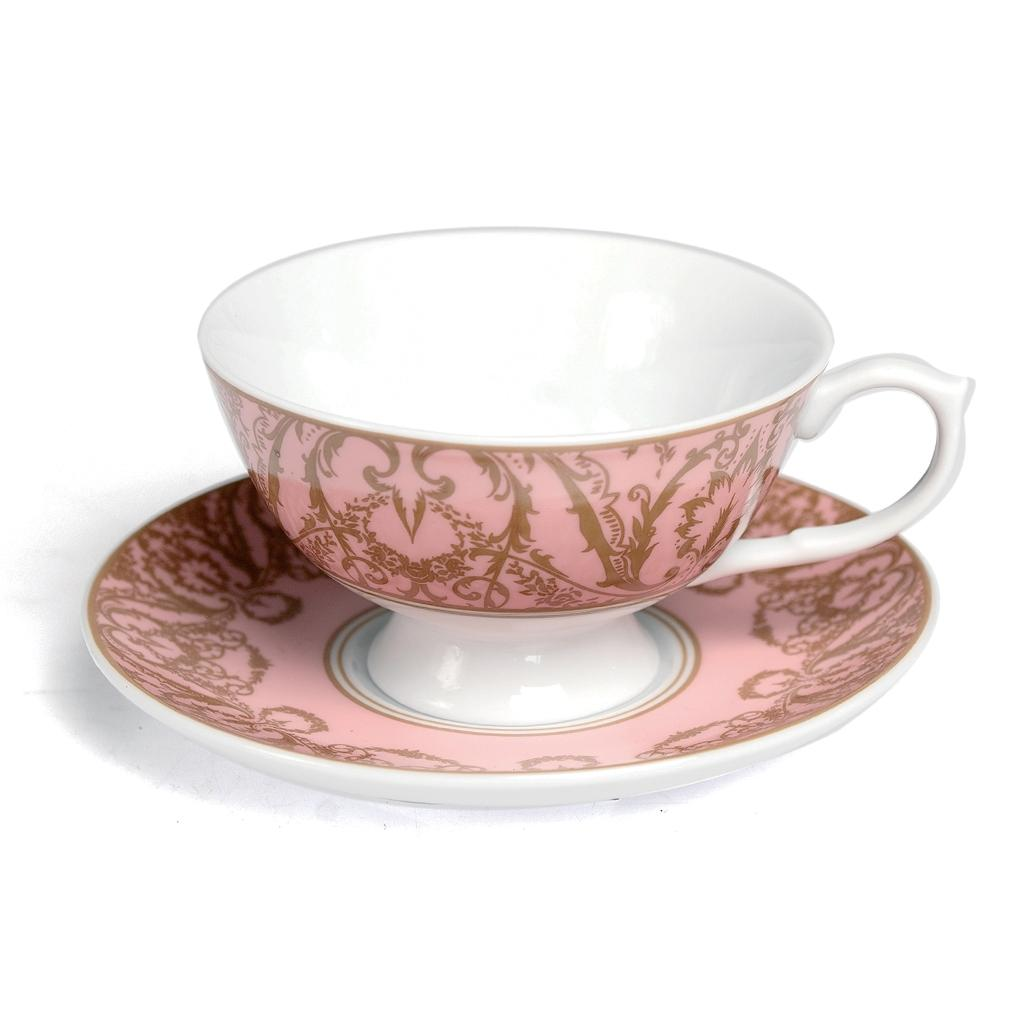 

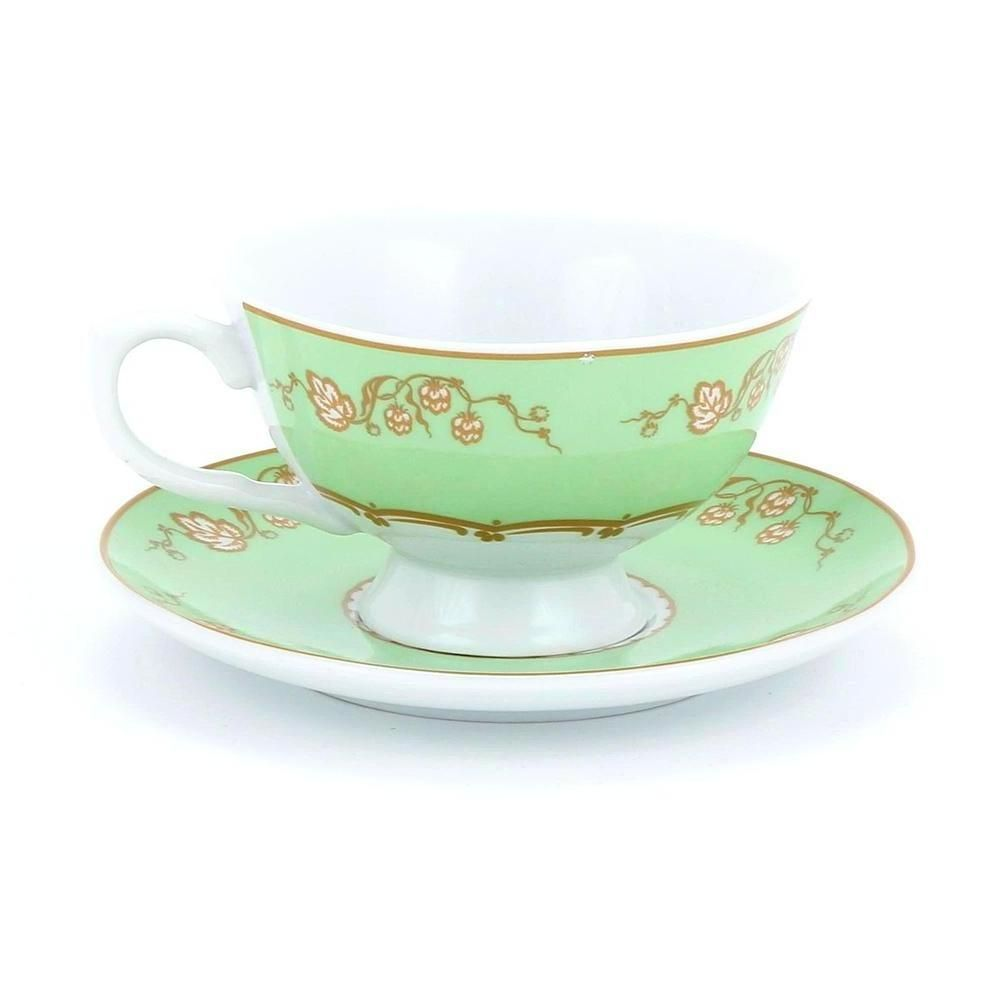

## Association Rule Mining in US Census Data

In [72]:
path = "https://raw.githubusercontent.com/cs6220/cs6220.spring2019/master/data/adult/"
names = pd.read_csv(path + "adult.names", sep="\n", header=None)
parse_cols = lambda x: x.str.split(":", expand=True).iloc[:, 0]
columns = np.roll(parse_cols(names.iloc[92:108, 0]), shift=-1)
df_adult = pd.read_csv(path + "adult.data", sep=",", header=None, index_col=False)
df_adult.columns = columns

In [73]:
df_adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,">50K, <=50K."
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [75]:
df_adult.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
>50K, <=50K.      object
dtype: object

### 2.1.1 Transforming data

In [76]:
categorical_col = df_adult.select_dtypes(include=['object']).columns.to_list()
df_adult_cat = df_adult[categorical_col]
df_adult_cat = df_adult_cat.rename(columns={"marital-status":"maritalstatus","native-country":"nativecountry",
                                           ">50K, <=50K.":"y"})
df_adult_cat

,workclass,education,maritalstatus,occupation,relationship,race,sex,nativecountry,y
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [78]:
onehot_census_df = pd.get_dummies(df_adult_cat)
onehot_census_df.columns

Index(['workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th',
       ...
       'nativecountry_ Scotland', 'nativecountry_ South',
       'nativecountry_ Taiwan', 'nativecountry_ Thailand',
       'nativecountry_ Trinadad&Tobago', 'nativecountry_ United-States',
       'nativecountry_ Vietnam', 'nativecountry_ Yugoslavia', 'y_ <=50K',
       'y_ >50K'],
      dtype='object', length=104)

In [79]:
onehot_census_df

,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,...,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia,y_ <=50K,y_ >50K
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
32557,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
32558,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
32559,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


### 2.1.2 Confidence Rules

In [80]:
#Generate frequent itemsets with apriori algorithm with max_len 3
frequent_itemsets = apriori(onehot_census_df, use_colnames=True, min_support = 0.25, max_len=3)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x:len(x))
frequent_itemsets = frequent_itemsets.sort_values(by = 'support', ascending=False)
frequent_itemsets['length'].value_counts()

2    30
3    28
1    11
Name: length, dtype: int64

In [81]:
frequent_itemsets

,support,itemsets,length
9,0.895857,(nativecountry_ United-States),1
6,0.854274,(race_ White),1
34,0.786862,"(nativecountry_ United-States, race_ White)",2
10,0.759190,(y_ <=50K),1
0,0.697030,(workclass_ Private),1
40,0.675624,"(y_ <=50K, nativecountry_ United-States)",2
8,0.669205,(sex_ Male),1
35,0.635699,"(y_ <=50K, race_ White)",2
16,0.618378,"(nativecountry_ United-States, workclass_ Private)",2
38,0.598507,"(nativecountry_ United-States, sex_ Male)",2


<b>Obeservations</b><br>
1. _(NativeCountry_UnitedStates)_ is a frequent 1-itemset with high support, which makes sense as this is US census data
2. _(Race_White, NativeCountry_UnitedStates)_ is a frequent 2-itemset with high support
3. _(Race_White, NativeCountry_UnitedStates, y_<=50K)_ is a frequent 3-itemset with high support, indicates there are many people with income <=50K
4. _(Race_White, NativeCountry_UnitedStates, Workclass_Private)_ is a frequent 3-itemset with high support, indicates there are many private working people with race white in US
5. Similarly, _(Race_White, NativeCountry_UnitedStates, Sex_Male)_ is a frequent 3-itemset

In [83]:
rules_confidence_1 = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6).sort_values(by = 'confidence',
                                                                                                ascending=False)
rules_confidence_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
60,(relationship_ Husband),(sex_ Male),0.405178,0.669205,0.405147,0.999924,1.494196,0.134000,4364.171954
64,"(relationship_ Husband, maritalstatus_ Married-civ-spouse)",(sex_ Male),0.404902,0.669205,0.404871,0.999924,1.494196,0.133909,4361.194804
91,"(relationship_ Husband, race_ White)",(sex_ Male),0.366696,0.669205,0.366666,0.999916,1.494184,0.121270,3949.686435
100,"(relationship_ Husband, nativecountry_ United-States)",(sex_ Male),0.364270,0.669205,0.364239,0.999916,1.494183,0.120468,3923.553669
138,"(relationship_ Husband, workclass_ Private)",(sex_ Male),0.263260,0.669205,0.263229,0.999883,1.494135,0.087054,2835.570529
62,(relationship_ Husband),(maritalstatus_ Married-civ-spouse),0.405178,0.459937,0.404902,0.999318,2.172729,0.218545,791.672741
65,"(relationship_ Husband, sex_ Male)",(maritalstatus_ Married-civ-spouse),0.405147,0.459937,0.404871,0.999318,2.172729,0.218529,791.612734
142,"(relationship_ Husband, workclass_ Private)",(maritalstatus_ Married-civ-spouse),0.263260,0.459937,0.263075,0.999300,2.172690,0.141993,771.570386
95,"(relationship_ Husband, race_ White)",(maritalstatus_ Married-civ-spouse),0.366696,0.459937,0.366420,0.999246,2.172573,0.197763,716.483933
67,(relationship_ Husband),"(maritalstatus_ Married-civ-spouse, sex_ Male)",0.405178,0.409048,0.404871,0.999242,2.442850,0.239134,779.643457


<b>Interesting Rules</b><br>
1. _(NativeCountry_United-States, Sex_Female) ==> (Income <=50K)_ is a rule with confidence 0.89, which indicates majority of females in United States have annual income less than 50K
2. _(Education_HS-grad) ==> (Income <=50K)_ with confidence 0.79 indicates high school grads mostly make <50K per year
3. _(maritalstatus_NeverMarried) ==> (Income <=50K, race_White)_ with confidence 0.78 indicates unmarried people make <50K 
4. _(maritalstatus_NeverMarried) ==> (workclass_private)_ with confidence 0.76 indicates many unmarried people work in orivate sectors
5. _(workclass_private, Sex_Male) ==> (Income <=50K)_ with confidence 0.71 says many male private sector workers earn less than 50K


### 2.1.3 Lift Rules

In [85]:
rules_lift_1 = association_rules(frequent_itemsets, metric="lift", min_threshold=1).sort_values(by = 'lift',
                                                                                                ascending=False)
rules_lift_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
40,"(maritalstatus_ Married-civ-spouse, sex_ Male)",(relationship_ Husband),0.409048,0.405178,0.404871,0.989789,2.442850,0.239134,58.253195
41,(relationship_ Husband),"(maritalstatus_ Married-civ-spouse, sex_ Male)",0.405178,0.409048,0.404871,0.999242,2.442850,0.239134,779.643457
78,"(maritalstatus_ Married-civ-spouse, race_ White)",(relationship_ Husband),0.411842,0.405178,0.366420,0.889709,2.195848,0.199550,5.393214
79,(relationship_ Husband),"(maritalstatus_ Married-civ-spouse, race_ White)",0.405178,0.411842,0.366420,0.904343,2.195848,0.199550,6.148624
93,(relationship_ Husband),"(nativecountry_ United-States, maritalstatus_ Married-civ-spouse)",0.405178,0.410553,0.363994,0.898355,2.188162,0.197647,5.799091
92,"(nativecountry_ United-States, maritalstatus_ Married-civ-spouse)",(relationship_ Husband),0.410553,0.405178,0.363994,0.886595,2.188162,0.197647,5.245106
37,(maritalstatus_ Married-civ-spouse),(relationship_ Husband),0.459937,0.405178,0.404902,0.880342,2.172729,0.218545,4.971013
36,(relationship_ Husband),(maritalstatus_ Married-civ-spouse),0.405178,0.459937,0.404902,0.999318,2.172729,0.218545,791.672741
39,"(relationship_ Husband, sex_ Male)",(maritalstatus_ Married-civ-spouse),0.405147,0.459937,0.404871,0.999318,2.172729,0.218529,791.612734
42,(maritalstatus_ Married-civ-spouse),"(relationship_ Husband, sex_ Male)",0.459937,0.405147,0.404871,0.880275,2.172729,0.218529,4.968497


<b>Interesting Rules</b><br>
1. _(relationship_Husband, workclass_Private)_ ==> _(maritalstatus_Married-civ-spouse)_  is a rule with lift 2.17, which indicates most of private sector married men have civilian spouses
2. _(maritalstatus_NeverMarried)_ ==> _(nativecountry_United-States, Income_<=50K)_ with lift 1.26 indicates many unmarried people have income less that <50
3. _(sex_ Female)_ ==> _(Income_<=50K)_ with lift 1.17 indicates many females have income less than 50K
4. _(Income_<=50K)_ ==> _(education_HS-grad)_ with lift 1.1 indicates many people with annual income <50K are high school graduates
5. _(maritalstatus_NeverMarried)_ ==> _(workclass_Private)_ with lift 1.03 indicates many unmarried people work in private sector
6. _(nativecountry_United-States)_ ==> _(education_HS-grad)_ with lift 1.03 indicates many people from US have highest education high school graduates



###  2.4 Rule comparison for different support level - Decreased from 0.25 to 0.1

In [86]:
#Generate frequent itemsets with apriori algorithm with max_len 3
frequent_itemsets2 = apriori(onehot_census_df, use_colnames=True, min_support = 0.1, max_len=3)
frequent_itemsets2['length'] = frequent_itemsets2['itemsets'].apply(lambda x:len(x))
frequent_itemsets2 = frequent_itemsets2.sort_values(by = 'support', ascending=False)
frequent_itemsets2['length'].value_counts()

3    135
2     79
1     23
Name: length, dtype: int64

In [87]:
frequent_itemsets2

,support,itemsets,length
20,0.895857,(nativecountry_ United-States),1
17,0.854274,(race_ White),1
92,0.786862,"(nativecountry_ United-States, race_ White)",2
21,0.759190,(y_ <=50K),1
0,0.697030,(workclass_ Private),1
100,0.675624,"(y_ <=50K, nativecountry_ United-States)",2
19,0.669205,(sex_ Male),1
93,0.635699,"(y_ <=50K, race_ White)",2
34,0.618378,"(nativecountry_ United-States, workclass_ Private)",2
97,0.598507,"(nativecountry_ United-States, sex_ Male)",2


#### Confidence rules

In [88]:
rules_confidence_2 = association_rules(frequent_itemsets2, metric="confidence", min_threshold=0.6).sort_values(by = 'confidence',
                                                                                                ascending=False)
#apply df highlighting
rules_confidence_2


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
250,"(y_ >50K, relationship_ Husband)",(sex_ Male),0.181751,0.669205,0.181751,1.000000,1.494309,0.060122,inf
60,(relationship_ Husband),(sex_ Male),0.405178,0.669205,0.405147,0.999924,1.494196,0.134000,4364.171954
64,"(relationship_ Husband, maritalstatus_ Married-civ-spouse)",(sex_ Male),0.404902,0.669205,0.404871,0.999924,1.494196,0.133909,4361.194804
91,"(relationship_ Husband, race_ White)",(sex_ Male),0.366696,0.669205,0.366666,0.999916,1.494184,0.121270,3949.686435
100,"(relationship_ Husband, nativecountry_ United-States)",(sex_ Male),0.364270,0.669205,0.364239,0.999916,1.494183,0.120468,3923.553669
138,"(relationship_ Husband, workclass_ Private)",(sex_ Male),0.263260,0.669205,0.263229,0.999883,1.494135,0.087054,2835.570529
180,"(relationship_ Husband, y_ <=50K)",(sex_ Male),0.223427,0.669205,0.223396,0.999863,1.494104,0.073878,2406.530051
325,"(relationship_ Husband, education_ HS-grad)",(sex_ Male),0.131415,0.669205,0.131384,0.999766,1.493960,0.043441,1415.469703
254,"(y_ >50K, relationship_ Husband)",(maritalstatus_ Married-civ-spouse),0.181751,0.459937,0.181628,0.999324,2.172743,0.098034,799.023602
62,(relationship_ Husband),(maritalstatus_ Married-civ-spouse),0.405178,0.459937,0.404902,0.999318,2.172729,0.218545,791.672741


<b>Interesting Observations</b><br>
1. _(Income>50K, relationship_Husband)_ ==> _(maritalstatus_Married-civ-spouse)_ has low support (0.18), as we decreased the min support level, but high confidence 0.99, which indicates husbands with income >50K have mostly civilian spouses
2. Even though the support threshold is decreased, rules can have high confidence because the combination might not be present in the transactions a lot, but out of all the rows that have antecedents, consequents can be present in many rows
3.  _(Imaritalstatus_NeverMarried, relationship_OwnChild)_ ==> _(Income<50K)_ has low support (0.13) but high confidence(0.99) and indicates unmarried people that are own children mostly have income less than 50K
4. _(maritalstatus_Never-married, sex_Female)_ ==> _(y_<=50K)_ indicates many unmarried females have income less that 50K. This also has a low support but high confidence
5. _(occupation_ Craft-repair)_ ==> (sex_ Male) has a low support but high confidence, and indicates most of the Craft repair workers are male
6. These rules would not be found in the earlier itemset rules as they are below the support threshold we set before(0.25)

In [89]:
rules_lift_2 = association_rules(frequent_itemsets2, metric="lift", min_threshold=1).sort_values(by = 'lift',
                                                                                                ascending=False)
#apply df highlighting
rules_lift_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
443,(relationship_ Own-child),"(y_ <=50K, maritalstatus_ Never-married)",0.155646,0.313012,0.136697,0.878256,2.805817,0.087978,5.642873
438,"(y_ <=50K, maritalstatus_ Never-married)",(relationship_ Own-child),0.313012,0.155646,0.136697,0.436715,2.805817,0.087978,1.498981
518,"(nativecountry_ United-States, maritalstatus_ Never-married)",(relationship_ Own-child),0.294186,0.155646,0.127852,0.434597,2.792205,0.082063,1.493365
523,(relationship_ Own-child),"(nativecountry_ United-States, maritalstatus_ Never-married)",0.155646,0.294186,0.127852,0.821429,2.792205,0.082063,3.952557
581,(relationship_ Own-child),"(race_ White, maritalstatus_ Never-married)",0.155646,0.268941,0.116121,0.746054,2.774038,0.074261,2.878792
578,"(race_ White, maritalstatus_ Never-married)",(relationship_ Own-child),0.268941,0.155646,0.116121,0.431769,2.774038,0.074261,1.485934
442,(maritalstatus_ Never-married),"(y_ <=50K, relationship_ Own-child)",0.328092,0.153589,0.136697,0.416643,2.712722,0.086306,1.450933
439,"(y_ <=50K, relationship_ Own-child)",(maritalstatus_ Never-married),0.153589,0.328092,0.136697,0.890022,2.712722,0.086306,6.109477
579,"(race_ White, relationship_ Own-child)",(maritalstatus_ Never-married),0.130678,0.328092,0.116121,0.888602,2.708393,0.073246,6.031580
580,(maritalstatus_ Never-married),"(race_ White, relationship_ Own-child)",0.328092,0.130678,0.116121,0.353927,2.708393,0.073246,1.345548


<b>Interesting Observations</b><br>
* _(nativecountry_ United-States, occupation_ Craft-repair)_ ==> _(sex_ Male)_ has low support 0.1, which means these do not appear that frequently in all transaction, but it has high lift 1.4, which indicates many of craft repair workers are male
* Since we have set a low support threshold, we also get itemsets that appear less frequently but as they have high lift, it uncovers unique relationships that do hold in these itemsets
* _(sex_Male, education_HS-grad) ==>(maritalstatus_Married-civ-spouse)_ has low support but high threshold, indicates out of married men with high school gradutation highesht education level, many have civilian spouses
* _(education_HS-grad) ==>	(Income<=50K, maritalstatus_Married-civ-spouse)_ has high lift, so people with highest education level as high school grad have income <50K and civilian spouses
* _(y_ >50K)_ ==> _(maritalstatus_Married-civ-spouse, workclass_Private)_ indicates many people who earn more than 50 K have civilian spouses and work in private sector
